In [56]:
import numpy as np
import pandas as pd




In [57]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4


<Axes: xlabel='x', ylabel='y'>

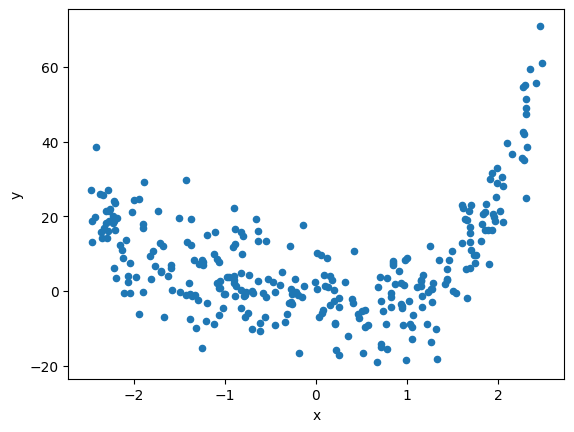

In [58]:
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [59]:
from sklearn import model_selection
X= X.reshape(-1, 1)
y=y.reshape(-1, 1)

X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y,test_size=0.2)


In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

<Axes: >

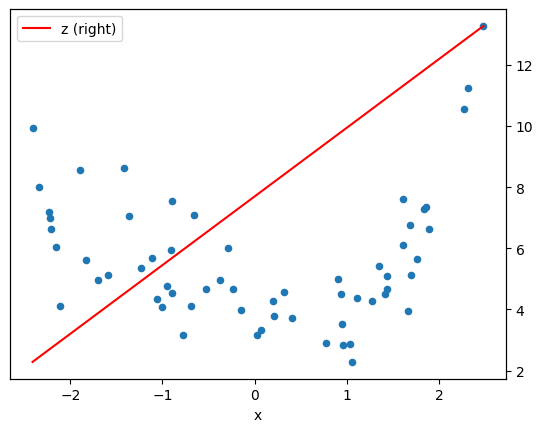

In [61]:
dff=pd.DataFrame({'x':X_test.reshape(-1), 'y':y_test.reshape(-1), 'z':lin_reg.predict(X_test).reshape(-1)})
dff=dff.sort_values(by='x')
a=dff.plot.scatter(x='x', y='y')
dff.plot.line(x='x', y='z',secondary_y=True, ax=a, color="red")

In [62]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_3 = KNeighborsRegressor(n_neighbors=3)
knn_reg_3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [63]:
knn_reg_5 = KNeighborsRegressor(n_neighbors=5)
knn_reg_5.fit(X_train, y_train)

KNeighborsRegressor()

<Axes: xlabel='x', ylabel='t'>

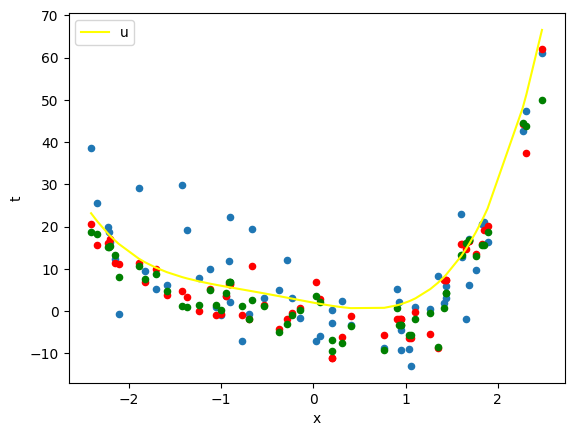

In [64]:
dff=pd.DataFrame({'x': X_test.reshape(-1), 'y':y_test.reshape(-1), 'z':knn_reg_3.predict(X_test).reshape(-1), 't':knn_reg_5.predict(X_test).reshape(-1), 'u' : (w4*(X_test**4) + w3*(X_test**3) + w2*(X_test**2) + w1*X_test + w0).reshape(-1)}).sort_values(by='x')

ax=dff.plot.scatter(x='x', y='y')
dff.plot.scatter(x='x', y='z', ax=ax, color="red")
dff.plot.scatter(x='x', y='t', ax=ax, color="green")
dff.plot.line(x='x', y='u', ax=ax, color="yellow")

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2=poly_features_2.fit_transform(X_train)

lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly_2, y_train)

LinearRegression()

<Axes: xlabel='x', ylabel='y'>

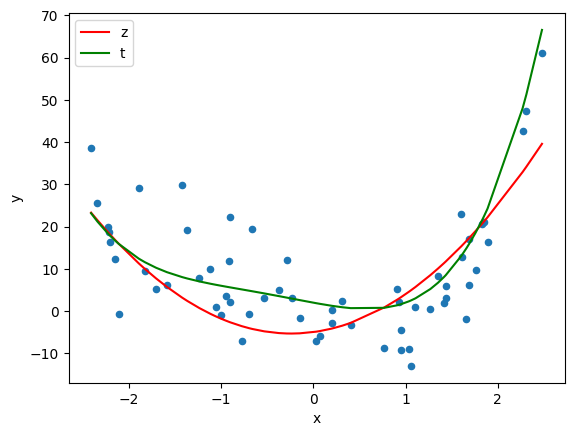

In [66]:
ddf=pd.DataFrame({'x':X_test.reshape(-1), 'y':y_test.reshape(-1), 'z':lin_reg_2.predict(poly_features_2.fit_transform(X_test)).reshape(-1), 't':(w4*(X_test**4) + w3*(X_test**3) + w2*(X_test**2) + w1*X_test + w0).reshape(-1)}).sort_values(by='x')
ax=ddf.plot.scatter(x='x', y='y')

ddf.plot.line(x='x', y='z', color='red', ax=ax)
ddf.plot.line(x='x', y='t', color="green", ax=ax)


In [67]:
poly_features_3=PolynomialFeatures(degree=3, include_bias=False)
X_poly_3=poly_features_3.fit_transform(X_train)

lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly_3, y_train)



LinearRegression()

In [68]:
poly_features_4=PolynomialFeatures(degree=4, include_bias=False)
X_poly_4=poly_features_4.fit_transform(X_train)

lin_reg_4=LinearRegression()
lin_reg_4.fit(X_poly_4, y_train)


LinearRegression()

In [69]:
poly_features_5=PolynomialFeatures(degree=5, include_bias=False)
X_poly_5=poly_features_5.fit_transform(X_train)

lin_reg_5=LinearRegression()
lin_reg_5.fit(X_poly_5, y_train)

LinearRegression()

In [70]:
ddf=pd.DataFrame({
    'x': X_test.reshape(-1),
    'p2': lin_reg_2.predict(poly_features_2.fit_transform(X_test)).reshape(-1),
    'p3': lin_reg_3.predict(poly_features_3.fit_transform(X_test)).reshape(-1),
    'p4': lin_reg_4.predict(poly_features_4.fit_transform(X_test)).reshape(-1),
    'p5': lin_reg_5.predict(poly_features_5.fit_transform(X_test)).reshape(-1),
    'y': y_test.reshape(-1),
    'z': (w4*(X_test**4) + w3*(X_test**3) + w2*(X_test**2) + w1*X_test + w0).reshape(-1)
}).sort_values(by='x')

<Axes: xlabel='x', ylabel='y'>

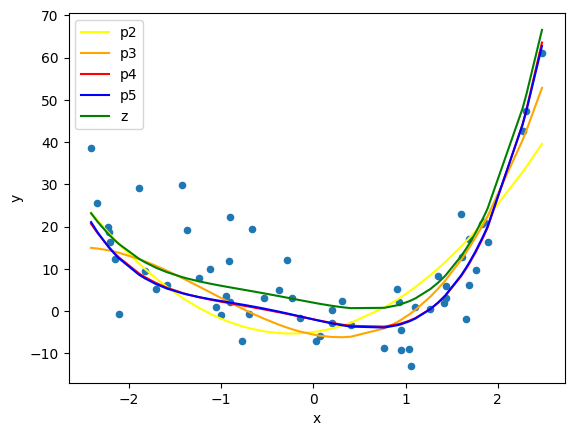

In [71]:
ax=ddf.plot.scatter(x='x', y='y')
ddf.plot.line(x='x', y='p2', color='yellow', ax=ax)
ddf.plot.line(x='x', y='p3', color='orange', ax=ax)
ddf.plot.line(x='x', y='p4', color='red', ax=ax)
ddf.plot.line(x='x', y='p5', color='blue', ax=ax)
ddf.plot.line(x='x', y='z', color='green', ax=ax)


In [72]:
#zadanie 2:
import pickle as pk
with open("reg.pkl","wb") as f:
    pk.dump([(lin_reg, None),
             (knn_reg_3, None),
             (knn_reg_5, None),
             (lin_reg_2, poly_features_2),
             (lin_reg_3, poly_features_3),
             (lin_reg_4, poly_features_4),
             (lin_reg_5, poly_features_5)],
            f)

In [75]:
from sklearn.metrics import mean_squared_error as mse

df=pd.DataFrame({
    "train_mse":[
        mse(y_train, lin_reg.predict(X_train)),
        mse(y_train, knn_reg_3.predict(X_train)),
        mse(y_train, knn_reg_5.predict(X_train)),
        mse(y_train, lin_reg_2.predict(poly_features_2.fit_transform(X_train))),
        mse(y_train, lin_reg_3.predict(poly_features_3.fit_transform(X_train))),
        mse(y_train, lin_reg_4.predict(poly_features_4.fit_transform(X_train))),
        mse(y_train, lin_reg_5.predict(poly_features_5.fit_transform(X_train)))
    ],
    "test_mse": [
        mse(y_test, lin_reg.predict(X_test)),
        mse(y_test, knn_reg_3.predict(X_test)),
        mse(y_test, knn_reg_5.predict(X_test)),
        mse(y_test, lin_reg_2.predict(poly_features_2.fit_transform(X_test))),
        mse(y_test, lin_reg_3.predict(poly_features_3.fit_transform(X_test))),
        mse(y_test, lin_reg_4.predict(poly_features_4.fit_transform(X_test))),
        mse(y_test, lin_reg_5.predict(poly_features_5.fit_transform(X_test)))
    ]
}, index=["lin_reg", "knn_3_reg", "knn_5_reg",
          "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"])

df

,train_mse,test_mse
lin_reg,212.820200,218.255673
knn_3_reg,44.004825,72.075487
knn_5_reg,51.593358,78.219110
poly_2_reg,88.798335,110.074490
poly_3_reg,69.210252,75.941736
poly_4_reg,60.515269,67.971381
poly_5_reg,60.474692,67.417229


In [74]:
with open("mse.pkl", 'wb') as f:
    pk.dump(df, f)